<H1>Basic Perimeter Compression Analysis</H1>
Table shows parameters for the graphs below. Next stage is to develop the 3D surface plot for each timestep based on STD and MEAN to identify a possible gradient decent optimum.<p>
<style type="text/css">
	table.tableizer-table {
		font-size: 12px;
		border: 1px solid #CCC; 
		font-family: Arial, Helvetica, sans-serif;
	} 
	.tableizer-table td {
		padding: 4px;
		margin: 3px;
		border: 1px solid #CCC;
	}
	.tableizer-table th {
		background-color: #104E8B; 
		color: #FFF;
		font-weight: bold;
	}
</style>
<table class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th>Pr/Pc</th><th>10</th><th>20</th><th>30</th><th>40</th><th>50</th><th>60</th><th>70</th><th>80</th><th>90</th><th>100</th></tr></thead><tbody>
 <tr><td>0.1</td><td>0,0</td><td>0,1</td><td>0,2</td><td>0,3</td><td>0,4</td><td>0,5</td><td>0,6</td><td>0,7</td><td>0,8</td><td>0,9</td></tr>
 <tr><td>0.2</td><td>1,0</td><td>1,1</td><td>1,2</td><td>1,3</td><td>1,4</td><td>1,5</td><td>1,6</td><td>1,7</td><td>1,8</td><td>1,9</td></tr>
 <tr><td>0.3</td><td>2,0</td><td>2,1</td><td>2,2</td><td>2,3</td><td>2,4</td><td>2,5</td><td>2,6</td><td>2,6</td><td>2,8</td><td>2,9</td></tr>
 <tr><td>0.4</td><td>3,0</td><td>3,1</td><td>3,2</td><td>3,3</td><td>3,4</td><td>3,5</td><td>3,6</td><td>3,7</td><td>3,8</td><td>3,9</td></tr>
 <tr><td>0.5</td><td>4,0</td><td>4,1</td><td>4,2</td><td>4,3</td><td>4,4</td><td>4,5</td><td>4,6</td><td>4,7</td><td>4,8</td><td>4,9</td></tr>
 <tr><td>0.6</td><td>5,0</td><td>5,1</td><td>5,2</td><td>5,3</td><td>5,4</td><td>5,5</td><td>5,6</td><td>5,7</td><td>5,8</td><td>5,9</td></tr>
 <tr><td>0.7</td><td>6,0</td><td>6,1</td><td>6,2</td><td>6,3</td><td>6,4</td><td>6,5</td><td>6,6</td><td>6,7</td><td>6,8</td><td>6,9</td></tr>
 <tr><td>0.8</td><td>7,0</td><td>7,1</td><td>7,2</td><td>7,3</td><td>7,4</td><td>7,5</td><td>7,6</td><td>7,7</td><td>7,8</td><td>7,9</td></tr>
 <tr><td>0.9</td><td>8,0</td><td>8,1</td><td>8,2</td><td>8,3</td><td>8,4</td><td>8,5</td><td>8,6</td><td>8,7</td><td>8,8</td><td>8,9</td></tr>
</tbody></table>

								


In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 120)
X = np.linspace(1,9,9)
#X = np.linspace(1,5,5)
Y = np.linspace(10,100,10)

In [2]:
# load all particle data from simulator
S=[]
C=[]
SDATA=[]
CDATA=[]
for x in X:
    for y in Y:
        S.append(pd.DataFrame(pd.read_csv('data/csv/exp-0.%d0-%d.00.p.csv'%(x,y))))
        C.append(pd.DataFrame(pd.read_csv('data/csv/exp-0.%d0-%d.00.c.csv'%(x,y))))
    CDATA.append(C)
    SDATA.append(S)
    S=[]
    C=[]

FileNotFoundError: [Errno 2] No such file or directory: 'data/csv/exp-0.10-10.00.p.csv'

In [3]:
# Calculate perimeter data
PDATA = []
P = []
for x in np.arange(0,len(SDATA),1) :
    for y in np.arange(0,len(SDATA[0]),1) :
        P.append(SDATA[x][y][["STEP","PERIM"]].query("PERIM == True").groupby('STEP').count().reset_index())
    PDATA.append(P)
    P=[]

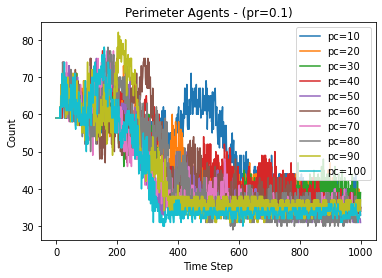

In [4]:
%matplotlib inline
#SET pr to required dataset
pr = 0
pc = 0 # Do not change!
for p in PDATA[pr]:
    plt.plot(p.STEP,p.PERIM,label=("pc=%d0"%(pc+1)))
    pc += 1
plt.legend()
plt.title("Perimeter Agents - (pr=0.%d)"%(pr+1))
plt.xlabel("Time Step")
plt.ylabel("Count")
plt.show()

In [7]:
pr = 0
pc = 0
step = 50
AGENTS=SDATA[pr][pc][["STEP","ID","X","Y"]].query("STEP==%d" % step)
NAGENTS=CDATA[pr][pc][["STEP","PID","ID","X","Y","Z"]].query("STEP==%d" % step)
LINKS=NAGENTS.merge(AGENTS, left_on=("PID"), right_on=("NID"), how="inner", suffixes=("_N","_P")) 
#CS = SDATA[pr][pc].merge(CDATA[pr][pc], left_on=('STEP','ID'), right_on=('STEP','PID'), how="inner" ,suffixes=('_S','_C'))[["STEP","X_S","Y_S","X_C","Y_C"]].query("STEP == %d" % step)

KeyError: "['ID'] not in index"

In [6]:
LINKS

NameError: name 'LINKS' is not defined

In [ ]:
%matplotlib qt
#for i,row in NAGENTS.iterrows():
#    plt.plot([row["PX"], row["NX"]], [row["PY"], row["NY"]],"ko-")
for i,row in LINKS.iterrows():
    plt.plot([row["X_P"], row["X_N"]], [row["Y_P"], row["Y_N"]],"ko-")
plt.scatter(AGENTS["X"],AGENTS["Y"],s=100)
plt.title("Swarm position at STEP:[%d][pr=0.%d,pc=%d0]"%(step,pr+1,pc+1))
plt.grid()
plt.gca().set_aspect("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()


In [ ]:
%matplotlib qt
fig = plt.figure()
ax1 = fig.add_subplot(111)
start = 0
end = 3001
step = 100
for x in np.arange(start,end,step) :
    state = SDATA[pr][pc][SDATA[pr][pc]["STEP"]==x].reset_index()
    ax1.scatter(state["X"],state["Y"], label="STEP %d"%x, s=(x+2)/8)

plt.title("Agent positions STEP:[%d,%d:%d][pr=0.%d,pc=%d0]"%(start,end,step,pr+1,pc+1))
plt.xlim([-23, 23])
plt.ylim([-12, 15])
plt.grid()
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()

In [ ]:
#Calculate mean of each timestep for all experiments
MEANDATA = []
MEAN = []
for x in np.arange(0,len(SDATA),1) :
    for y in np.arange(0,len(SDATA[0]),1) :
        MEAN.append(SDATA[x][y][["STEP","IMAG"]].groupby('STEP').mean(0).reset_index())
    MEANDATA.append(MEAN)
    MEAN=[]
#Calculate std of each timestep for all experiments
STDDATA = []
STD = []
for x in np.arange(0,len(SDATA),1) :
    for y in np.arange(0,len(SDATA[0]),1) :
        STD.append(SDATA[x][y][["STEP","IMAG"]].groupby('STEP').std(0).reset_index())
    STDDATA.append(STD)
    STD=[]


In [ ]:
%matplotlib inline
#SET pr to required dataset
pr = 3
pc = 0 # Do not change!
for m in MEANDATA[pr]:
    plt.plot(m.STEP,m.IMAG,label=("pc=%d0"%(pc+1)))
    pc += 1
plt.title("Inter-agent MEAN Aggregated Magnitude (pr=0.%d)"%(pr+1))
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
%matplotlib inline
#SET pr to required dataset
pr = 0
pc = 0 # Do not change!
for s in STDDATA[pr]:
    plt.plot(s.STEP,s.IMAG,label=("pc=%d0"%(pc+1)))
    pc += 1
plt.title("Inter-agent STD Aggregated Magnitude (pr=0.%d)"%(pr+1))
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
%matplotlib qt
#SET pr and pc to required dataset. See table above
pr=8
pc=9
plt.errorbar(MEANDATA[pr][pc].STEP,MEANDATA[pr][pc].IMAG,STDDATA[pr][pc].IMAG,label='Cohesion magnitude',ecolor='red',color='black')
plt.title("Inter-agent Aggregated Magnitude (pr=0.%d,pc=%d0)"%(pr+1,pc+1))
plt.legend()
plt.xlabel("Time Step")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
def mean_value(x,y,slice):
    i,j = x.shape
    ans = np.empty_like(x)
    for ii in np.arange(0,i-1,1) :
        for jj in np.arange(0,j-1,1) :
            ans[ii][jj] = MEANDATA[ii][jj]["IMAG"][slice]
    return ans

def std_value(x,y,slice):
    i,j = x.shape
    ans = np.empty_like(x)
    for ii in np.arange(0,i-1,1) :
        for jj in np.arange(0,j-1,1) :
            ans[ii][jj] = STDDATA[ii][jj]["IMAG"][slice]
    return ans

In [ ]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 16
#Font sizes modifiers for inclusion in papers. 
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
%matplotlib qt
epoch = 500
xx,yy = np.meshgrid(np.arange(0,len(SDATA),1),np.arange(0,len(SDATA[0]),1))
F = mean_value(xx,yy,epoch)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("Inter-agent Aggregated MEAN Magnitudes @ epoch:%d"%epoch)
ax.set_xlabel("pr")
ax.set_ylabel("pc")
ax.set_zlabel("Magnitude")
ax.plot_surface(xx,yy,F, cmap=cm.coolwarm)

In [ ]:
%matplotlib qt
epoch = 0
xx,yy = np.meshgrid(np.arange(0,len(SDATA),1),np.arange(0,len(SDATA[0]),1))
F = mean_value(xx,yy,epoch)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title("Inter-agent Aggregated STD Magnitudes @ epoch:%d"%epoch)
ax.set_xlabel("pr")
ax.set_ylabel("pc")
ax.set_zlabel("Magnitude")
ax.plot_surface(xx,yy,F, cmap=cm.coolwarm)

<H1>ANIMATED</H1>